# Computing SSR, SSE, SST and the R-squared
This short demo notebook shows how to assess the quality of a machine learning regression model using the r-squared metric and synthetic data

### Import

In [7]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mnorm
from mpl_toolkits import mplot3d

### Fonts

In [8]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Create a simple model
We create a distribution for input variable x with mean 0 and a standard deviation of 1. <br>
Output y is computed as ax + b + n, where a and b are our slope and intercept, respectively. <br>
n represents some noise we add to our data y to make the model non-deterministic. The amount of noise is set by the noise_level parameter

In [9]:
a_actual = 2.0
b_actual = 1.0
no_points = 20
np.random.seed(100)
noise_level = 0.25
x = (np.random.random(no_points) - 0.5)*1.8
n_dist = mnorm(0,1)
N = n_dist.rvs(no_points)*noise_level
y = x*a_actual + b_actual + N

### Compute Metrics - Bad Fitting Model

In [10]:
a = 0.5
b = 1.0
x0 = -1.0
x1 = +1.0
y0 = a*x0 + b
y1 = a*x1 + b
y_pred = a*x + b
y_mean = np.mean(y)
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
SSE = SST - SSR
rsquared = SSR/SST
print(SST)
print(SSR)
print(SSE)
print(rsquared)

28.59383564121998
1.7087843572489865
26.88505128397099
0.0597605854174267


### Plot Data

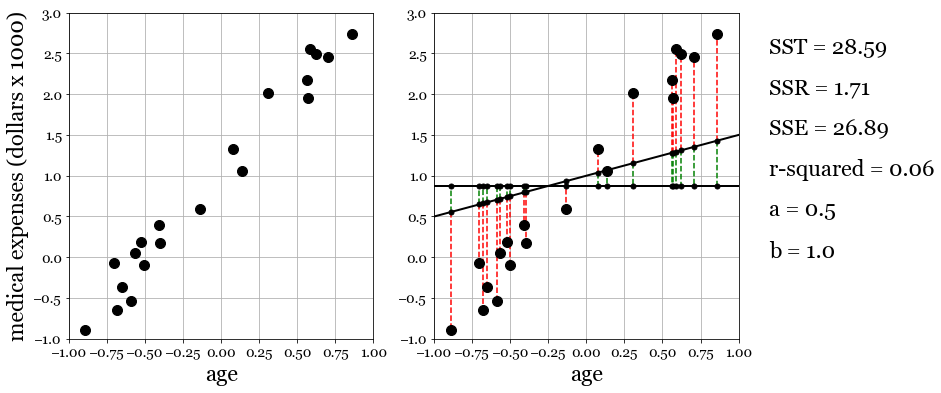

In [11]:
plt.figure(figsize=(12,6));
plt.subplot(1,2,1)
plt.scatter(x,y,c='k',s=100,zorder=1010);
plt.grid();
plt.xlabel('age',fontsize=22,**csfont);
plt.ylabel('medical expenses (dollars x 1000)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.axis((-1,1,-1,3))

plt.subplot(1,2,2)
plt.scatter(x,y,c='k',s=100,zorder=1010);
plt.plot([x0,x1],[y0,y1],'k',zorder=2000,linewidth=2);
plt.plot([x0,x1],[y_mean,y_mean],'k',linewidth=2,zorder=3000);
for idx in range(len(x)):
    plt.plot([x[idx],x[idx]],[y_pred[idx],y_mean],'g--') #SS Error
    plt.plot([x[idx],x[idx]],[y_pred[idx],y[idx]],'r--') #SS Error
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_mean,s=25,color='k',zorder=1000)
plt.text(1.2,2.5,"SST = " + str(np.round(SST,2)),fontsize=22,**csfont);
plt.text(1.2,2.0,"SSR = " + str(np.round(SSR,2)),fontsize=22,**csfont);
plt.text(1.2,1.5,"SSE = " + str(np.round(SSE,2)),fontsize=22,**csfont);
plt.text(1.2,1.0,"r-squared = " + str(np.round(rsquared,2)),fontsize=22,**csfont);
plt.text(1.2,0.5,"a = " + str(np.round(a,2)),fontsize=22,**csfont);
plt.text(1.2,0.0,"b = " + str(np.round(b,2)),fontsize=22,**csfont);
plt.grid();
plt.xlabel('age',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.axis((-1,1,-1,3))
plt.savefig('../../assets/figures/014/rsquared_0.png', dpi=300,bbox_inches="tight")

### Compute Metrics - Good Fitting Model

In [12]:
a = 2.0
b = 1.0
x0 = -1.0
x1 = +1.0
y0 = a*x0 + b
y1 = a*x1 + b
y_pred = a*x + b
y_mean = np.mean(y)
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
SSE = SST - SSR
rsquared = SSR/SST
print(SST)
print(SSR)
print(SSE)
print(rsquared)

28.59383564121998
25.299273831135714
3.2945618100842644
0.884780697090707


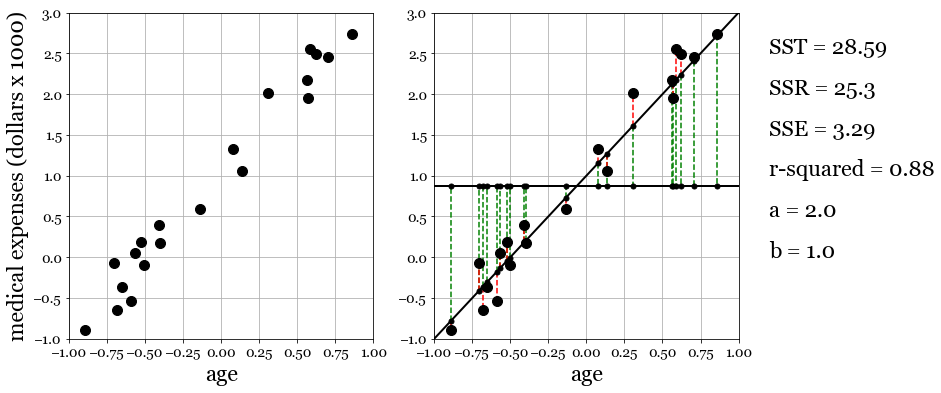

In [13]:
plt.figure(figsize=(12,6));
plt.subplot(1,2,1)
plt.scatter(x,y,c='k',s=100,zorder=1010);
plt.grid();
plt.xlabel('age',fontsize=22,**csfont);
plt.ylabel('medical expenses (dollars x 1000)',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.axis((-1,1,-1,3))

plt.subplot(1,2,2)
plt.scatter(x,y,c='k',s=100,zorder=1010);
plt.plot([x0,x1],[y0,y1],'k',zorder=2000,linewidth=2);
plt.plot([x0,x1],[y_mean,y_mean],'k',linewidth=2,zorder=3000);
for idx in range(len(x)):
    plt.plot([x[idx],x[idx]],[y_pred[idx],y_mean],'g--') #SS Error
    plt.plot([x[idx],x[idx]],[y_pred[idx],y[idx]],'r--') #SS Error
    plt.scatter(x[idx],y_pred[idx],s=25,color='k',zorder=1000)
    plt.scatter(x[idx],y_mean,s=25,color='k',zorder=1000)
plt.text(1.2,2.5,"SST = " + str(np.round(SST,2)),fontsize=22,**csfont);
plt.text(1.2,2.0,"SSR = " + str(np.round(SSR,2)),fontsize=22,**csfont);
plt.text(1.2,1.5,"SSE = " + str(np.round(SSE,2)),fontsize=22,**csfont);
plt.text(1.2,1.0,"r-squared = " + str(np.round(rsquared,2)),fontsize=22,**csfont);
plt.text(1.2,0.5,"a = " + str(np.round(a,2)),fontsize=22,**csfont);
plt.text(1.2,0.0,"b = " + str(np.round(b,2)),fontsize=22,**csfont);
plt.grid();
plt.xlabel('age',fontsize=22,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.axis((-1,1,-1,3))
plt.savefig('../../assets/figures/014/rsquared_1.png', dpi=300,bbox_inches="tight")